# PART ONE

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Import of scientific libraries

- Pandas is used for handling tabular data
- Numpy for numerical comutation
- Matplotlib for visualisation 
- SciPy for statistical analysis


In [4]:
df = pd.read_excel("data.xlsx")
df.head()

,Série,5,5.1,Unnamed: 3,Unnamed: 4,S5
0,RSD:,7.000,4.000,NaN,NaN,C
1,REF,49.130,49.770,NaN,10.0,9.800777
2,1,55.101,49.138,NaN,10.0,12.254704
3,2,44.762,50.282,NaN,10.0,11.590869
4,3,51.454,52.862,NaN,10.0,10.692108


Data loading and inspection

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Série       25 non-null     object 
 1   5           25 non-null     float64
 2   5.1         25 non-null     float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  42 non-null     float64
 5   S5          43 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.1+ KB


In [7]:
df.columns

Index(['Série', 5, '5.1', 'Unnamed: 3', 'Unnamed: 4', 'S5'], dtype='object')

The excel file does not contain a single clean table. Several colomns are empty or contain labels. The dataset was therefore insoected to identify which columns correspond to the comparison test and which correspond to the accuracy test. 

In [9]:
df_raw = df.copy()
df_raw.head()

,Série,5,5.1,Unnamed: 3,Unnamed: 4,S5
0,RSD:,7.000,4.000,NaN,NaN,C
1,REF,49.130,49.770,NaN,10.0,9.800777
2,1,55.101,49.138,NaN,10.0,12.254704
3,2,44.762,50.282,NaN,10.0,11.590869
4,3,51.454,52.862,NaN,10.0,10.692108


Preserve original import

In [11]:
df_raw.iloc[:10, :6]

,Série,5,5.1,Unnamed: 3,Unnamed: 4,S5
0,RSD:,7.000,4.000,NaN,NaN,C
1,REF,49.130,49.770,NaN,10.0,9.800777
2,1,55.101,49.138,NaN,10.0,12.254704
3,2,44.762,50.282,NaN,10.0,11.590869
4,3,51.454,52.862,NaN,10.0,10.692108
5,4,49.648,47.998,NaN,10.0,9.318845
6,5,47.177,47.922,NaN,10.0,10.218197
7,6,53.897,53.682,NaN,20.0,21.63061
8,7,45.294,52.974,NaN,20.0,20.170285
9,8,44.461,49.698,NaN,20.0,20.803307


Identify columns by position

In [13]:
step1 = df_raw.iloc[2:26, 1:3]
step1.columns = ["department_1", "department_2"]
step1 = step1.astype(float)

Data structuring

In [15]:
step1.head()
step1.describe()

,department_1,department_2
count,23.000000,23.000000
mean,49.350043,49.967043
std,4.521143,2.247061
min,42.354000,45.922000
25%,45.444500,48.020000
50%,49.648000,49.698000
75%,53.361500,52.024000
max,55.948000,53.682000


Sanity check

In [17]:
ref_department_1 = df_raw.iloc[1,1]
ref_department_2 = df_raw.iloc[1,2]

ref_department_1, ref_department_2

(49.13, 49.77)

Extract reference values

In [19]:
mean_dep1 = step1["department_1"].mean()
mean_dep2 = step1["department_2"].mean()

mean_dep1,mean_dep2

(49.350043478260865, 49.96704347826088)

The mean concentrations measured by the two departments are approximately 49.35 µg/L and 49.97 µg/L


In [21]:
diff_dep1 = mean_dep1 - ref_department_1
diff_dep2 = mean_dep2 - ref_department_2

diff_dep1, diff_dep2

(0.22004347826086246, 0.19704347826087343)

Quantifying the deviation from the reference

In [23]:
step1_std = step1.std()
step1_std

department_1    4.521143
department_2    2.247061
dtype: float64

Agreement with the reference value:

Differences between mean and reference are:
≈ 0.2 µg/L for both departments

Standard deviations are:
≈ 4.5 µg/L and ≈ 2.3 µg/L

Because:
0.2 ≪ 2–4

the deviation from the reference is negligible compared to the measurement spread.

Homogeneity between laboratories

The mean concentrations measured by the two departments are very close to each other and to the reference values. 

The dispersion of the repeated measurements, as indicated by the standard deviations, shows that department 2 has lower variability and therefore better precision. However, the results produced by both departments are comparable in magnitude.

The two laboratories can therefore be considered homogeneous with respect to the analytical results.

# PART DEUX

In [27]:
step2 = df_raw.iloc[2:, 4:6]
step2.columns = ["reference", "measured"]
step2 = step2.dropna()
step2 = step2.astype(float)

step2.head()
step2.tail()

,reference,measured
38,100.0,98.609091
39,100.0,100.562500
40,100.0,98.800000
41,100.0,99.255357
42,100.0,103.933333


Data structuring

The reference and measured concentration data for the accuracy test were extracted and cleaned to remove non-numerical entries prior to regression analysis.

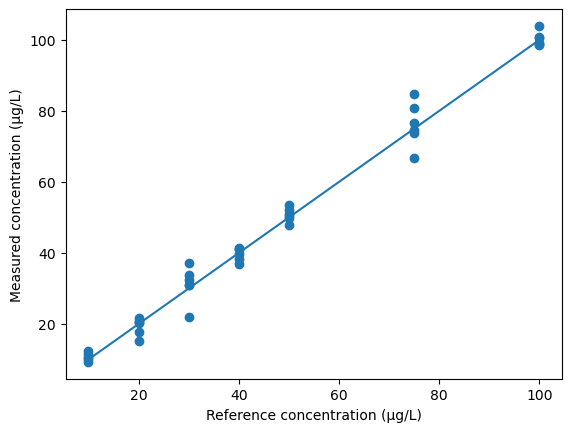

In [29]:
plt.figure()
plt.scatter(step2["reference"], step2["measured"])
plt.plot(step2["reference"], step2["reference"])
plt.xlabel("Reference concentration (µg/L)")
plt.ylabel("Measured concentration (µg/L)")
plt.show()


Visualising the accuracy test

The measured concentrations increase proportionally with the reference concentrations, indicating a linear relationship over the application range

In [31]:
slope, intercept, r_value, p_value, std_err = stats.linregress(
    step2["reference"], step2["measured"]
)

slope, intercept

(1.0049012249455225, 0.26601915184627245)

# Accuracy test

- Measured concentrations increase proportionally with the reference concentrations.
- The slope is close to the expected value of 1.
- The intercept is small and close to 0.
- No systematic deviation is observed across the concentration range.
- The method is accurate over the application range.

In [33]:
r_value**2

0.9878721064195649

for fun:

$R^2$ close to 1 shows that the standards and measurements follow each other very closely across the range